In [69]:
# Importing the libraries
import pandas as pd
import missingno as msno

In [70]:
# Loading the dataset
amazon = pd.read_csv("Datasets/Amazon Sale Report.csv", low_memory=False)
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [71]:
amazon = amazon.drop(['index'], axis=1)

The matrix depicts the pattern of missigness in the dataset

<AxesSubplot:>

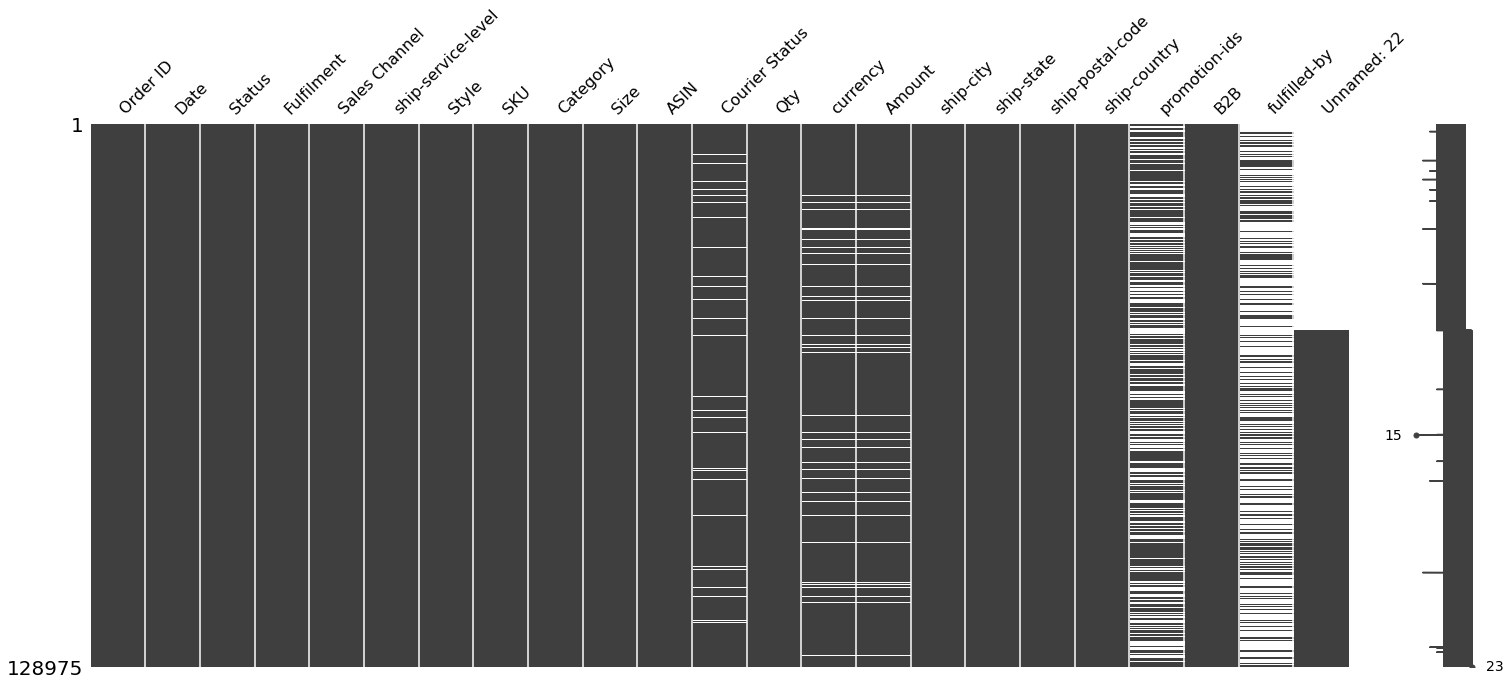

In [72]:
# Visualize missing values as a matrix
msno.matrix(amazon)

The bar chart depicts the number of missing values in each column of the dataset 

 * The pattern of missigness in the 'currency' and 'amount' columns is similar

<AxesSubplot:>

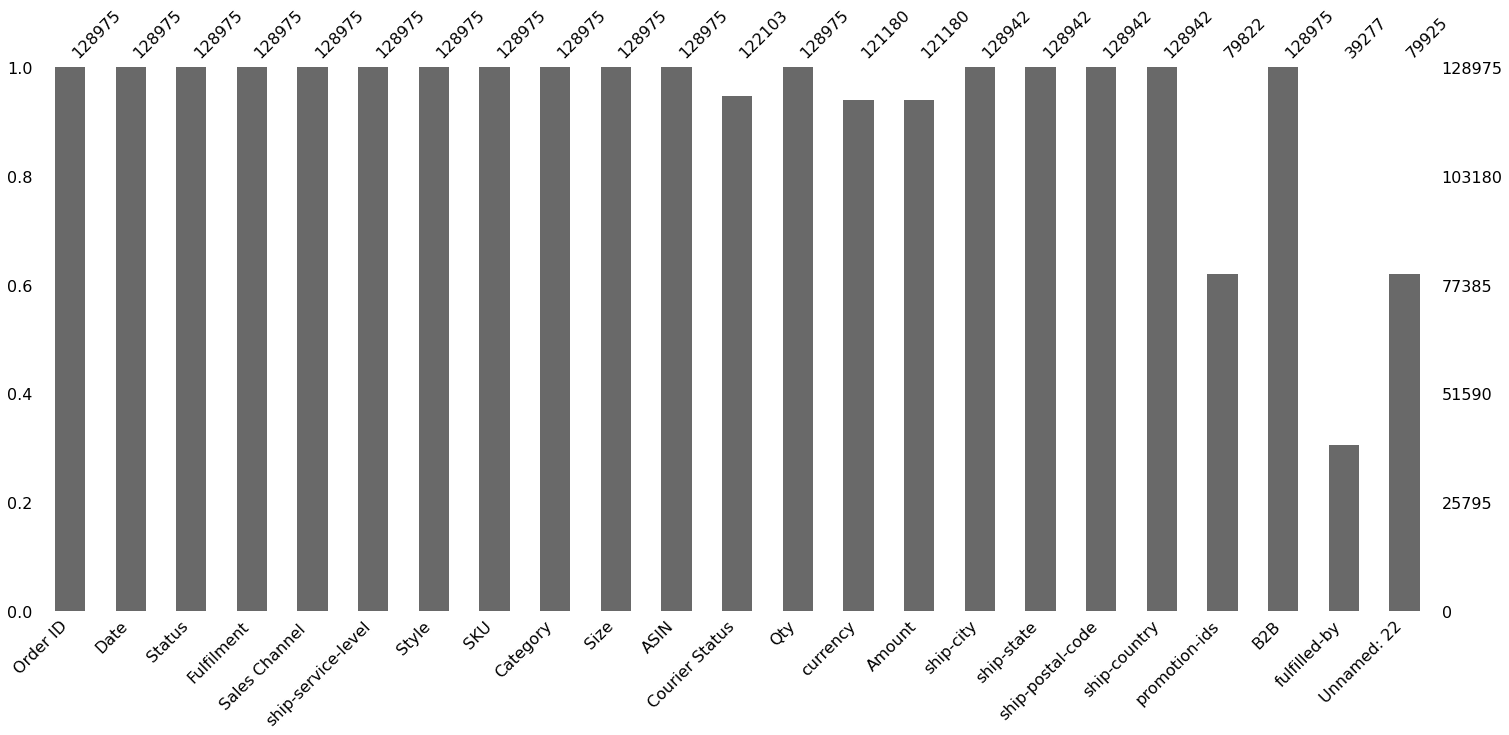

In [73]:
msno.bar(amazon)

From the above bar chart, we can observe that maximum number of missing values exist in the 'fulfilled-by' column

In [74]:
amazon.apply(pd.unique)

Order ID              [405-8078784-5731545, 171-9198151-1101146, 404...
Date                  [04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26...
Status                [Cancelled, Shipped - Delivered to Buyer, Ship...
Fulfilment                                           [Merchant, Amazon]
Sales Channel                                   [Amazon.in, Non-Amazon]
ship-service-level                                [Standard, Expedited]
Style                 [SET389, JNE3781, JNE3371, J0341, JNE3671, SET...
SKU                   [SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...
Category              [Set, kurta, Western Dress, Top, Ethnic Dress,...
Size                   [S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]
ASIN                  [B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7...
Courier Status                     [nan, Shipped, Cancelled, Unshipped]
Qty                                    [0, 1, 2, 15, 3, 9, 13, 5, 4, 8]
currency                                                     [IN

In [75]:
amazon.drop(columns = ['Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel '], inplace=True)

In [76]:
duplicates = len(amazon) - len(amazon.drop_duplicates(['Order ID', 'ASIN']))
amazon.drop_duplicates(['Order ID', 'ASIN'], inplace=True, ignore_index=True)
print(f"{duplicates} duplicates have been removed from the dataset")


7 duplicates have been removed from the dataset


In [77]:
amazon.head()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False


In [78]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128968 entries, 0 to 128967
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128968 non-null  object 
 1   Date                128968 non-null  object 
 2   Status              128968 non-null  object 
 3   Fulfilment          128968 non-null  object 
 4   ship-service-level  128968 non-null  object 
 5   Style               128968 non-null  object 
 6   SKU                 128968 non-null  object 
 7   Category            128968 non-null  object 
 8   Size                128968 non-null  object 
 9   ASIN                128968 non-null  object 
 10  Courier Status      122096 non-null  object 
 11  Qty                 128968 non-null  int64  
 12  Amount              121176 non-null  float64
 13  ship-city           128935 non-null  object 
 14  ship-state          128935 non-null  object 
 15  ship-postal-code    128935 non-nul

In [79]:
amazon.describe()

,Qty,Amount,ship-postal-code
count,128968.000000,121176.000000,128935.000000
mean,0.904449,648.557109,463965.409873
std,0.313331,281.210629,191475.232007
min,0.000000,0.000000,110001.000000
25%,1.000000,449.000000,382421.000000
50%,1.000000,605.000000,500033.000000
75%,1.000000,788.000000,600024.000000
max,15.000000,5584.000000,989898.000000


In [80]:
amazon[amazon.isnull().any(axis = 1)]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False
8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,Cancelled,0,NaN,HYDERABAD,TELANGANA,500008.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
9,402-4393761-0311520,04-30-22,Shipped,Amazon,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,B08B3XF5MH,Shipped,1,363.00,Chennai,TAMIL NADU,600041.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128959,406-9812666-2474761,05-31-22,Shipped,Amazon,Expedited,SET224,SET224-KR-NP-XS,Set,XS,B08MXDBRK1,Shipped,1,1132.00,CHENNAI 600042,TAMIL NADU,600042.0,NaN,False
128960,404-5182288-1653947,05-31-22,Cancelled,Amazon,Expedited,JNE3638,JNE3638-KR-XS,kurta,XS,B09814Q3QH,Cancelled,0,NaN,Kolkata,WEST BENGAL,700040.0,NaN,False
128962,404-3802633-7250760,05-31-22,Cancelled,Amazon,Expedited,SET044,SET044-KR-NP-M,Set,M,B07Q2RTSFB,Unshipped,1,612.00,MUMBAI,MAHARASHTRA,400017.0,NaN,False
128963,406-6001380-7673107,05-31-22,Shipped,Amazon,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013.0,NaN,False


In [81]:
amazon[amazon['promotion-ids'].isnull()]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False
9,402-4393761-0311520,04-30-22,Shipped,Amazon,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,B08B3XF5MH,Shipped,1,363.00,Chennai,TAMIL NADU,600041.0,NaN,False
10,407-5633625-6970741,04-30-22,Shipped,Amazon,Expedited,JNE3160,JNE3160-KR-G-S,kurta,S,B07K3YQLF1,Shipped,1,685.00,CHENNAI,TAMIL NADU,600073.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128959,406-9812666-2474761,05-31-22,Shipped,Amazon,Expedited,SET224,SET224-KR-NP-XS,Set,XS,B08MXDBRK1,Shipped,1,1132.00,CHENNAI 600042,TAMIL NADU,600042.0,NaN,False
128960,404-5182288-1653947,05-31-22,Cancelled,Amazon,Expedited,JNE3638,JNE3638-KR-XS,kurta,XS,B09814Q3QH,Cancelled,0,NaN,Kolkata,WEST BENGAL,700040.0,NaN,False
128962,404-3802633-7250760,05-31-22,Cancelled,Amazon,Expedited,SET044,SET044-KR-NP-M,Set,M,B07Q2RTSFB,Unshipped,1,612.00,MUMBAI,MAHARASHTRA,400017.0,NaN,False
128963,406-6001380-7673107,05-31-22,Shipped,Amazon,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013.0,NaN,False


In [82]:
amazon['promotion-ids'].fillna('no promotion', inplace=True)

In [83]:
amazon['Courier Status'].fillna('unknown', inplace = True)

In [84]:
amazon[amazon['Amount'].isnull()]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,Cancelled,0,NaN,HYDERABAD,TELANGANA,500008.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
29,404-5933402-8801952,04-30-22,Cancelled,Merchant,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,3XL,B07JG3CND8,unknown,0,NaN,GUWAHATI,ASSAM,781003.0,no promotion,False
65,171-4137548-0481151,04-30-22,Cancelled,Amazon,Expedited,JNE3373,JNE3373-KR-XXL,kurta,XXL,B082W8RWN1,Cancelled,0,NaN,Dahod,Gujarat,389151.0,no promotion,False
84,403-9950518-0349133,04-30-22,Cancelled,Amazon,Expedited,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,Cancelled,0,NaN,HYDERABAD,TELANGANA,500072.0,no promotion,False
95,405-9112089-3379536,04-30-22,Cancelled,Amazon,Expedited,JNE3405,JNE3405-KR-L,kurta,L,B081WSCKPQ,Cancelled,0,NaN,PUNE,MAHARASHTRA,411046.0,no promotion,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128896,406-3923120-4345139,05-31-22,Cancelled,Amazon,Expedited,JNE3801,JNE3801-KR-M,kurta,M,B09SDZ4FH9,Cancelled,0,NaN,ANANTAPUR,ANDHRA PRADESH,515001.0,no promotion,False
128900,403-6757403-6097100,05-31-22,Cancelled,Amazon,Expedited,NW014,NW014-ST-SR-XXXL,Set,3XL,B0928ZT74Y,Cancelled,0,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,no promotion,False
128901,403-6757403-6097100,05-31-22,Cancelled,Amazon,Expedited,NW007,NW007-ST-CP-XXXL,Set,3XL,B0928YCMQP,Cancelled,0,NaN,GREATER NOIDA,UTTAR PRADESH,201306.0,no promotion,False
128951,408-9513596-4393945,05-31-22,Cancelled,Amazon,Expedited,SET058,SET058-KR-NP-L,Set,L,B07R487XRD,Cancelled,0,NaN,Bengaluru,KARNATAKA,560037.0,no promotion,False


In [85]:
amazon['Amount'].fillna(0, inplace = True)

<AxesSubplot:>

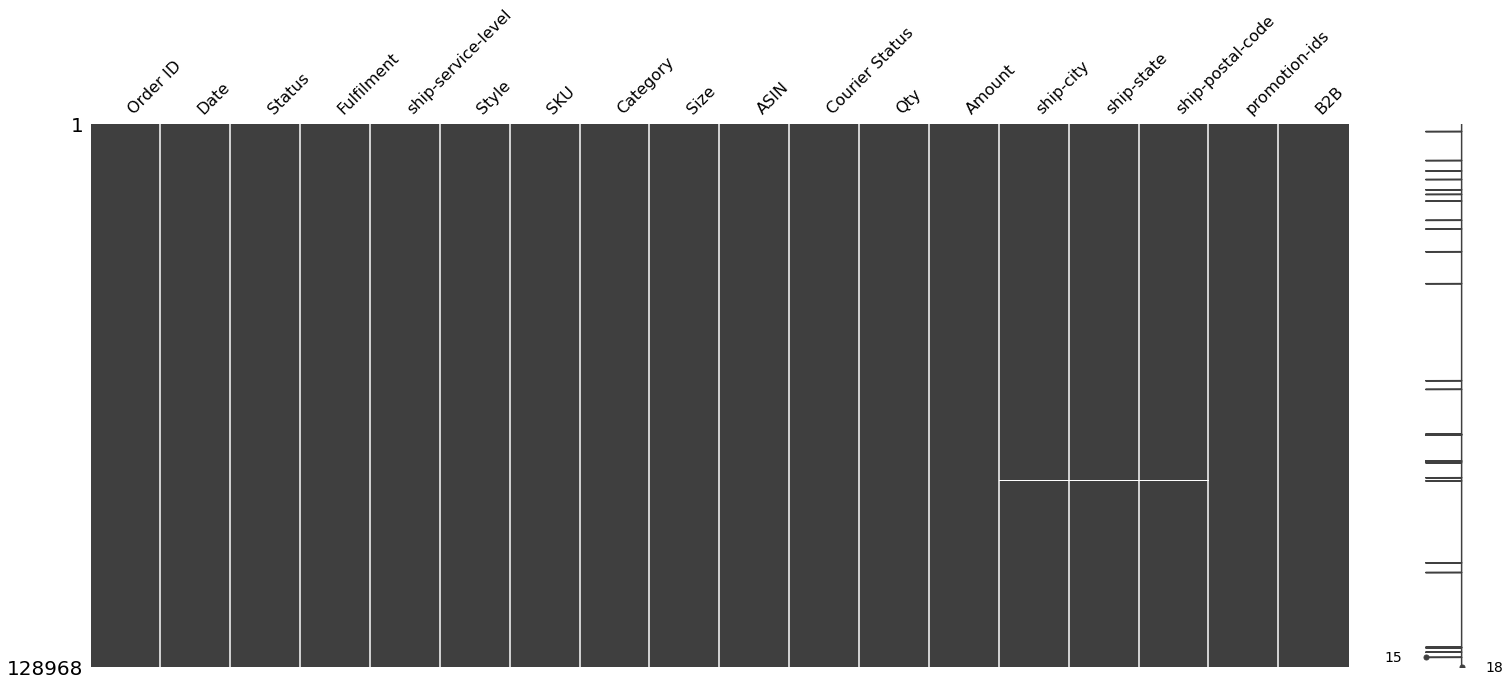

In [86]:
msno.matrix(amazon)

In [87]:
amazon[amazon['ship-city'].isnull()]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
1871,404-0566904-4825137,04-29-22,Shipped,Amazon,Expedited,J0301,J0301-TP-L,Top,L,B099S6795L,Shipped,1,493.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
1872,404-0566904-4825137,04-29-22,Shipped,Amazon,Expedited,JNE3697,JNE3697-KR-L,kurta,L,B09811Y7WM,Shipped,1,458.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
8752,406-4003386-8768363,04-25-22,Shipped,Amazon,Expedited,JNE3376,JNE3376-KR-M,kurta,M,B082W7HW86,Shipped,1,432.0,NaN,NaN,NaN,no promotion,False
11215,402-0107720-7057168,04-23-22,Shipped,Amazon,Expedited,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,654.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
13252,407-4532637-8415521,04-22-22,Cancelled,Merchant,Standard,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,unknown,0,380.0,NaN,NaN,NaN,no promotion,False
15688,404-9229894-8608305,04-21-22,Shipped,Amazon,Expedited,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,Shipped,1,442.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
16787,402-4919636-4333150,04-20-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE1233,JNE1233-BLUE-KR-031-XXXL,kurta,3XL,B07GPGP46N,Shipped,1,376.0,NaN,NaN,NaN,Amazon PLCC Free-Financing Universal Merchant ...,False
18351,405-4927647-8064368,04-19-22,Shipped,Amazon,Expedited,J0230,J0230-SKD-XS,Set,XS,B08XNHXSFZ,Shipped,1,1112.0,NaN,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
22930,402-8628677-0457954,04-16-22,Shipped - Returned to Seller,Merchant,Standard,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,654.0,NaN,NaN,NaN,Amazon PLCC Free-Financing Universal Merchant ...,False
24986,406-4079063-8291520,04-15-22,Cancelled,Amazon,Expedited,JNE3567,JNE3567-KR-XXL,kurta,XXL,B08KRYCC8J,Unshipped,1,399.0,NaN,NaN,NaN,no promotion,False


In [88]:
amazon['ship-city'].fillna('unknown', inplace = True)
amazon['ship-state'].fillna('unknown', inplace = True)
amazon['ship-postal-code'].fillna('unknown', inplace = True)

<AxesSubplot:>

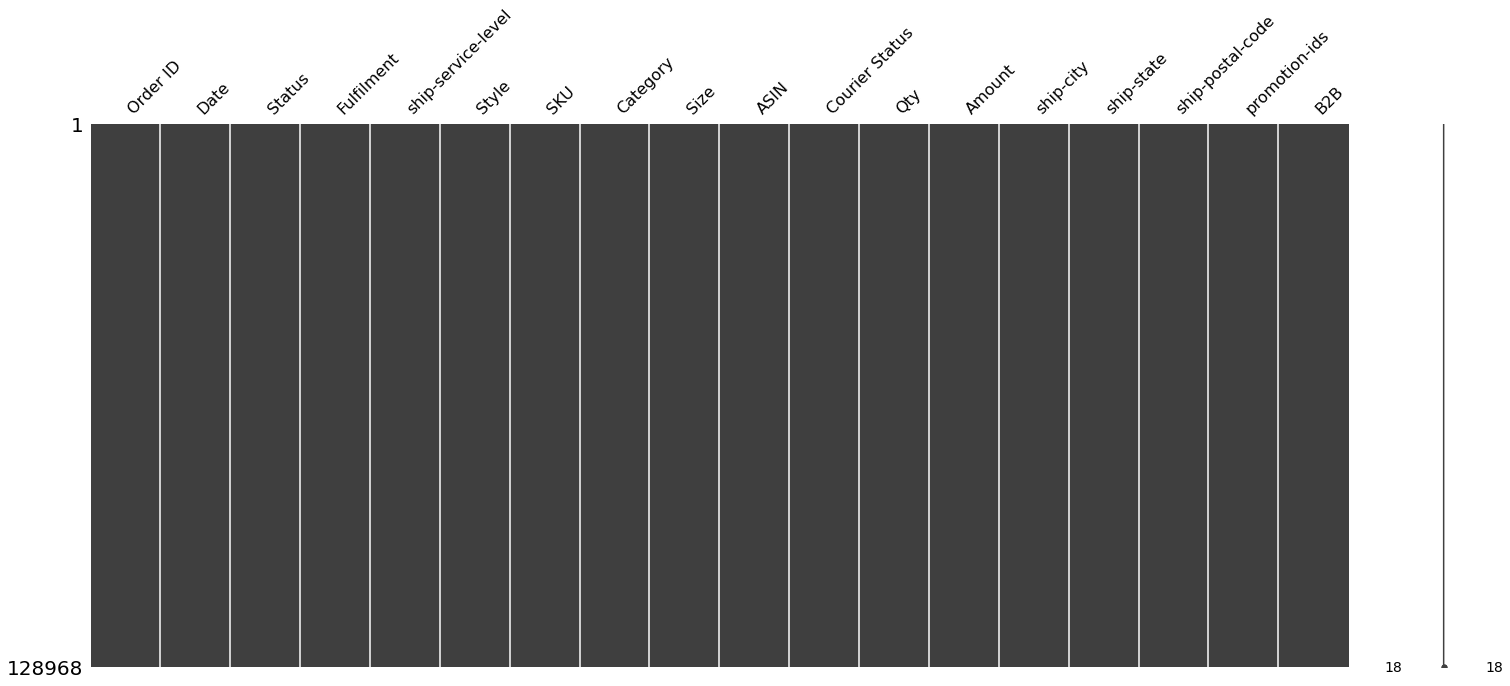

In [89]:
msno.matrix(amazon)

In [90]:
mapper = {
    'Order ID' : 'orderID',
    'Date' : 'date',
    'Status' : 'shipStatus',
    'Fulfilment' : 'fullfilment', 
    'ship-service-level' : 'serviceLevel', 
    'Style' : 'style', 
    'SKU' : 'sku', 
    'Category' : 'productCategory', 
    'Size' : 'size', 
    'ASIN' : 'asin', 
    'Courier Status' : 'courierShipStatus', 
    'Qty' : 'orderQuantity', 
    'Amount' : 'orderAmount (INR)', 
    'ship-city' : 'city', 
    'ship-state' : 'state',
    'ship-postal-code' : 'zip', 
    'promotion-ids' : 'promotion',
    'B2B' : 'customerType'
}

amazon.rename(columns = mapper, inplace = True)

In [91]:
amazon.head()

,orderID,date,shipStatus,fullfilment,serviceLevel,style,sku,productCategory,size,asin,courierShipStatus,orderQuantity,orderAmount (INR),city,state,zip,promotion,customerType
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,False


In [92]:
amazon['customerType'].replace([True, False], ['business', 'consumer'], inplace = True)
amazon.head()

,orderID,date,shipStatus,fullfilment,serviceLevel,style,sku,productCategory,size,asin,courierShipStatus,orderQuantity,orderAmount (INR),city,state,zip,promotion,customerType
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,consumer
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,consumer
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,consumer
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,consumer


In [93]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128968 entries, 0 to 128967
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   orderID            128968 non-null  object 
 1   date               128968 non-null  object 
 2   shipStatus         128968 non-null  object 
 3   fullfilment        128968 non-null  object 
 4   serviceLevel       128968 non-null  object 
 5   style              128968 non-null  object 
 6   sku                128968 non-null  object 
 7   productCategory    128968 non-null  object 
 8   size               128968 non-null  object 
 9   asin               128968 non-null  object 
 10  courierShipStatus  128968 non-null  object 
 11  orderQuantity      128968 non-null  int64  
 12  orderAmount (INR)  128968 non-null  float64
 13  city               128968 non-null  object 
 14  state              128968 non-null  object 
 15  zip                128968 non-null  object 
 16  pr

In [94]:
amazon['date'] = pd.to_datetime(amazon['date'])
amazon['month'] = amazon['date'].dt.month

In [95]:
amazon['month'].unique()

array([4, 3, 5, 6], dtype=int64)

In [96]:
amazon['date'].max()

Timestamp('2022-06-29 00:00:00')

In [97]:
amazon['date'].min()

Timestamp('2022-03-31 00:00:00')

In [98]:
months = ['March', 'April', 'May', 'June']
amazon['month'].replace([3, 4, 5, 6], months, inplace = True)

In [99]:
amazon.set_index('orderID', inplace = True)
amazon

,date,shipStatus,fullfilment,serviceLevel,style,sku,productCategory,size,asin,courierShipStatus,orderQuantity,orderAmount (INR),city,state,zip,promotion,customerType,month
orderID,,,,,,,,,,,,,,,,,,
405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,consumer,April
171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,consumer,April
404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business,April
403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,consumer,April
407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,consumer,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406-6001380-7673107,2022-05-31,Shipped,Amazon,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013.0,no promotion,consumer,May
402-9551604-7544318,2022-05-31,Shipped,Amazon,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.00,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,consumer,May
407-9547469-3152358,2022-05-31,Shipped,Amazon,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.00,HYDERABAD,TELANGANA,500049.0,no promotion,consumer,May


In [100]:
amazon.to_csv('Datasets/Final Amazon Dataset.csv', index = False)